In [1]:
import pandas as pd
import numpy  as np

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# remove ID
df = df.iloc[:,1:]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [5]:
df['Species'] = encoder.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

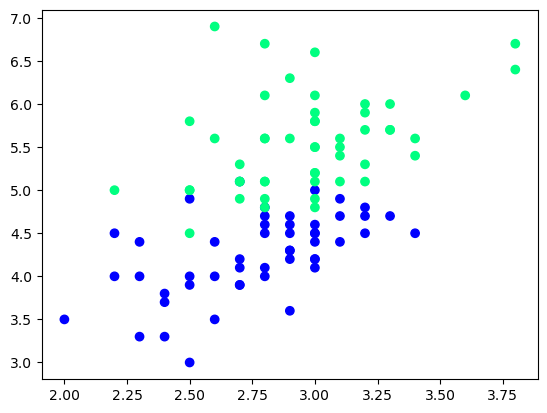

In [8]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [9]:
# sampling the data

df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
75,3.0,4.4,1
71,2.8,4.0,1
62,2.2,4.0,1
107,2.9,6.3,2
99,2.8,4.1,1
65,3.1,4.4,1
66,3.0,4.5,1
50,3.2,4.7,1
106,2.5,4.5,2
81,2.4,3.7,1


In [10]:
# taking rows for training and testing

df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [11]:
df_train

,SepalWidthCm,PetalLengthCm,Species
121,2.8,4.9,2
86,3.1,4.7,1
83,2.7,5.1,1
67,2.7,4.1,1
147,3.0,5.2,2
124,3.3,5.7,2
134,2.6,5.6,2
81,2.4,3.7,1
64,2.9,3.6,1
105,3.0,6.6,2


In [12]:
df_val

,SepalWidthCm,PetalLengthCm,Species
145,3.0,5.2,2
80,2.4,3.8,1
60,2.0,3.5,1
119,2.2,5.0,2
74,2.9,4.3,1


In [13]:
df_test

,SepalWidthCm,PetalLengthCm,Species
129,3.0,5.8,2
148,3.4,5.4,2
144,3.3,5.7,2
110,3.2,5.1,2
59,2.7,3.9,1


In [14]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [15]:
y_test

array([2, 1, 1, 2, 1])

In [16]:
X_test

array([[3. , 5.2],
       [2.4, 3.8],
       [2. , 3.5],
       [2.2, 5. ],
       [2.9, 4.3]])

# Case 1 - Bagging

In [17]:
df_train.sample(8,replace=True)

,SepalWidthCm,PetalLengthCm,Species
67,2.7,4.1,1
105,3.0,6.6,2
64,2.9,3.6,1
81,2.4,3.7,1
83,2.7,5.1,1
64,2.9,3.6,1
121,2.8,4.9,2
121,2.8,4.9,2


In [18]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
83,2.7,5.1,1
121,2.8,4.9,2
67,2.7,4.1,1
124,3.3,5.7,2
121,2.8,4.9,2
83,2.7,5.1,1
64,2.9,3.6,1
121,2.8,4.9,2


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
#from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [22]:
dt_bag1 = DecisionTreeClassifier()

In [24]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

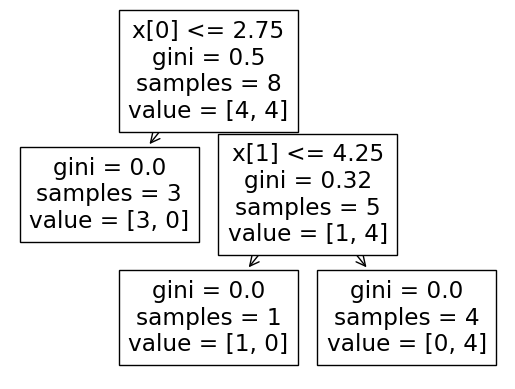

NameError: name 'plot_decision_regions' is not defined

In [25]:
evaluate(dt_bag1,X,y)

In [26]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
83,2.7,5.1,1
134,2.6,5.6,2
86,3.1,4.7,1
81,2.4,3.7,1
81,2.4,3.7,1
105,3.0,6.6,2
147,3.0,5.2,2
124,3.3,5.7,2


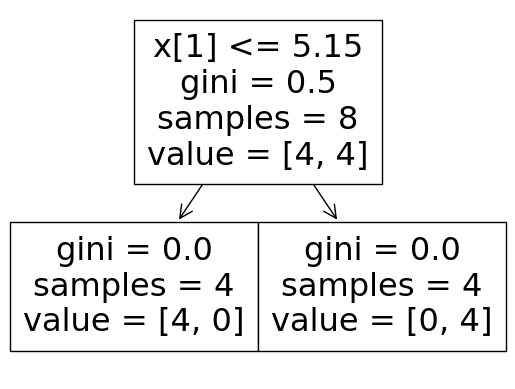

NameError: name 'plot_decision_regions' is not defined

In [27]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [28]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
124,3.3,5.7,2
124,3.3,5.7,2
147,3.0,5.2,2
134,2.6,5.6,2
86,3.1,4.7,1
147,3.0,5.2,2
67,2.7,4.1,1
105,3.0,6.6,2


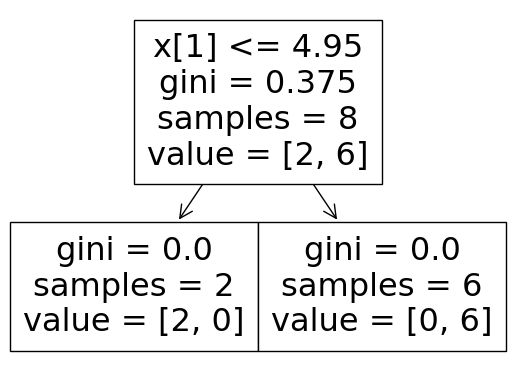

NameError: name 'plot_decision_regions' is not defined

In [29]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

# Predict

In [30]:
df_test

,SepalWidthCm,PetalLengthCm,Species
129,3.0,5.8,2
148,3.4,5.4,2
144,3.3,5.7,2
110,3.2,5.1,2
59,2.7,3.9,1


In [32]:
print('Predictor 1 ', dt_bag1.predict(np.array[3.4,5.4]).reshape(1,2))
print('Predictor 2 ', dt_bag2.predict(np.array[3.4,5.4]).reshape(1,2))
print('Predictor 3 ', dt_bag3.predict(np.array[3.4,5.4]).reshape(1,2))

TypeError: 'builtin_function_or_method' object is not subscriptable

# Pasting

In [33]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
121,2.8,4.9,2
86,3.1,4.7,1
83,2.7,5.1,1
67,2.7,4.1,1
147,3.0,5.2,2
124,3.3,5.7,2
134,2.6,5.6,2
81,2.4,3.7,1
64,2.9,3.6,1
105,3.0,6.6,2


In [34]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
134,2.6,5.6,2
81,2.4,3.7,1
121,2.8,4.9,2
105,3.0,6.6,2
147,3.0,5.2,2
67,2.7,4.1,1
83,2.7,5.1,1
124,3.3,5.7,2


# Random Subspaces

In [36]:
df1 = pd.read_csv('Iris.csv')
df1 = df1.sample(100)

In [37]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
60,61,5.0,2.0,3.5,1.0,Iris-versicolor
81,82,5.5,2.4,3.7,1.0,Iris-versicolor
30,31,4.8,3.1,1.6,0.2,Iris-setosa
94,95,5.6,2.7,4.2,1.3,Iris-versicolor
...,...,...,...,...,...,...
44,45,5.1,3.8,1.9,0.4,Iris-setosa
82,83,5.8,2.7,3.9,1.2,Iris-versicolor
7,8,5.0,3.4,1.5,0.2,Iris-setosa
58,59,6.6,2.9,4.6,1.3,Iris-versicolor


In [38]:
df1.sample(2,replace=True,axis=1)

,PetalLengthCm,PetalWidthCm
93,3.3,1.0
60,3.5,1.0
81,3.7,1.0
30,1.6,0.2
94,4.2,1.3
...,...,...
44,1.9,0.4
82,3.9,1.2
7,1.5,0.2
58,4.6,1.3


In [42]:
df1.sample(2,replace=True,axis=1)

,SepalLengthCm,PetalWidthCm
93,5.0,1.0
60,5.0,1.0
81,5.5,1.0
30,4.8,0.2
94,5.6,1.3
...,...,...
44,5.1,0.4
82,5.8,1.2
7,5.0,0.2
58,6.6,1.3


# Random Patches

In [43]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
60,61,5.0,2.0,3.5,1.0,Iris-versicolor
81,82,5.5,2.4,3.7,1.0,Iris-versicolor
30,31,4.8,3.1,1.6,0.2,Iris-setosa
94,95,5.6,2.7,4.2,1.3,Iris-versicolor
...,...,...,...,...,...,...
44,45,5.1,3.8,1.9,0.4,Iris-setosa
82,83,5.8,2.7,3.9,1.2,Iris-versicolor
7,8,5.0,3.4,1.5,0.2,Iris-setosa
58,59,6.6,2.9,4.6,1.3,Iris-versicolor


In [47]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,PetalWidthCm,Species
61,1.5,Iris-versicolor
133,1.5,Iris-virginica
127,1.8,Iris-virginica
6,0.3,Iris-setosa
39,0.2,Iris-setosa
48,0.2,Iris-setosa
3,0.2,Iris-setosa
131,2.0,Iris-virginica
